In [73]:
import sys
sys.path.append("..")

import Essentials

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
data_archive = np.load('../Data_First_Nikita.npz', allow_pickle=True)

In [76]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [77]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(all_X_2, all_Y_2, test_size=0.25, random_state=42)

In [79]:
y_train, timestamp_train = prepare_Y(y_train)

In [80]:
y_test, timestamp_test = prepare_Y(y_test)

In [81]:
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_2, y_summer_half_2, test_size=0.2, random_state=42)

In [82]:
x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_2, y_winter_half_2, test_size=0.2, random_state=42)

In [83]:
y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)

In [84]:
y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)

In [85]:
y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)

In [86]:
y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)

In [87]:
x_train.shape

(78, 43)

In [88]:
class LR(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)
        self.model = LinearRegression()
        self.train(x_train, y_train)
        self.set_model(self.model)

    def preprocessing(self, x):
        return x
    
    def postprocessing(self, x):
        return x

    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions

    def train(self, x_train, y_train):
        self.model.fit(x_train,y_train)

    def __str__(self):
        return  f"Коэффициенты линейной регрссии = {self.get_model().coef_.reshape(-1,1)}, Свободный член = {self.get_model().intercept_.reshape(-1, 1)}"

In [89]:
LR_test = LR("LR", x_train, y_train)

In [90]:
metric = Essentials.R2Metric()

In [91]:
print(LR_test)

Коэффициенты линейной регрссии = [[-1.43823855e+00]
 [ 2.90260851e+00]
 [-2.50092185e-01]
 [-4.33174075e-01]
 [-6.49439633e-01]
 [ 3.13902337e+01]
 [-1.20490731e-01]
 [ 4.05649581e+00]
 [ 1.21810471e+02]
 [ 6.02757929e+00]
 [-5.45207775e-01]
 [ 3.75006538e+01]
 [-4.33584205e+00]
 [-4.88540315e-01]
 [ 7.84969593e+01]
 [ 8.85784746e-01]
 [ 2.69104190e+00]
 [-4.58133768e+00]
 [ 1.47320429e+00]
 [-3.21936921e+00]
 [ 5.12710350e-02]
 [ 2.13188857e+00]
 [ 4.89022018e-01]
 [-2.10621810e-01]
 [ 2.47369215e+01]
 [ 5.62953715e-01]
 [-8.84006423e+01]
 [ 2.02112454e+00]
 [ 2.60822648e-01]
 [-1.10819379e+00]
 [ 9.65667591e-01]
 [-6.39945613e+00]
 [ 5.87791307e-01]
 [-6.95922303e-01]
 [-5.73608551e-01]
 [-2.18521786e+00]
 [ 4.89022018e-01]
 [-3.94972546e-01]
 [-4.80063563e+01]
 [-4.80365679e+01]
 [-1.06669629e+00]
 [-1.20113752e-03]
 [-4.55558501e+00]], Свободный член = [[-2818.88200603]]


In [92]:
LR_test.test(x_test, y_test, metric)

(array([[101.08595868],
        [ 61.8863768 ],
        [ 70.38590079],
        [ 82.65686962],
        [ 97.71832388],
        [ 78.86978765],
        [ 95.54400515],
        [ 13.53508781],
        [ 94.48870521],
        [110.48345158],
        [ 67.41863153],
        [ 94.01895506],
        [106.38860216],
        [ 98.2094639 ],
        [ 87.68156154],
        [ 61.10051746],
        [ 86.99404411],
        [108.46680305],
        [ 90.25716959],
        [ 93.96085738],
        [103.01666332],
        [ 83.10605577],
        [ 99.00574962],
        [ 89.71651908],
        [102.58793069],
        [ 77.50834923],
        [ 97.89688834]]),
 -5.048006571107887)

In [93]:
LR_test_visual_train = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'LR SoftSensor R2 metric on Train')

    Coefficient of determination
LR                      0.776076


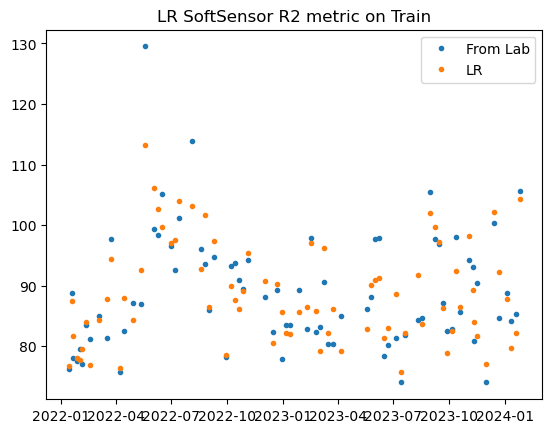

In [94]:
LR_test_visual_train.visualize([LR_test])

In [95]:
LR_test_visual_test = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'LR SoftSensor R2 metric on Test')

    Coefficient of determination
LR                     -5.048007


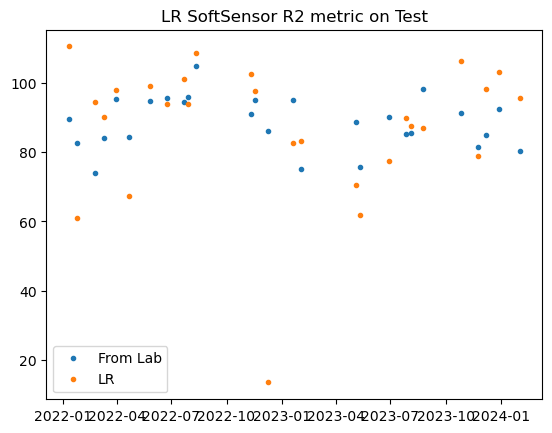

In [96]:
LR_test_visual_test.visualize([LR_test])